# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 7</span>

### Exercise 07.1

Use the Monte Carlo NVT code we have provided to print out instantaneous values of potential energy per particle, $U/N$, and pressure, $P$, along **equilibrated** Monte Carlo simulations (of  $M=10^5$ MC steps and where the Metropolis acceptance ratio has been fixed approximately to 50%) in the following thermodynamic conditions:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)
Nota: se vuoi NVE devi usare Molecular Dynamics, se vuoi NVT devi usare Monte Carlo.

1. <span style="color:red">Once this data has been produced, compute and make pictures with a python script of the autocorrelation functions of $U/N$ and $P$ to obtain the Monte Carlo correlation time</span> via a fit with an exponential function. This will suggest you how large should be the blocks in your simulations.

$$ \chi (t) = \frac { 
\langle x(t')x(t'+t) \rangle _{t'} 
-\langle x \rangle ^2  
} {\sigma_x ^2}
$$

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def treExp(x, a, b, c,d,e,f,g,h,i):
    return a * np.exp(-b * x) + c + d * np.exp(-e * x) + f \
                + g * np.exp(-h * x) + i
def dueExp(x,a,b,c,d,e,f):
    return a * np.exp(-b * x) + c + d * np.exp(-e * x)+f

def plotECorrelazione (fase,osservabile,T):

    ene = (np.loadtxt(fname = "risultati/"+ fase+"/output."+osservabile+".0", usecols=(1)))#[30000:40000]

    def autocorrelazione(x,T):
        tmp = (np.array([np.average(x[:-t]*x[t:]) for t in np.arange(1,T)]) -np.average(x)**2)/np.std(x)**2
        return np.append(1,tmp)

    xData = (np.arange(T))
    yData = (autocorrelazione(ene,T)) #vettore lungo T

    plt.plot (xData,yData,marker='.',markersize=4,linewidth=0)

    if (fase == "Liquido" and osservabile == "epot"):
        popt, pcov = curve_fit(treExp, xData, yData)
        tau = 1/min(popt[1],popt[4],popt[7])
        plt.plot(xData, treExp(xData, *popt), 'r-',    \
                 label = 'tau=%5.3f' % tau, linewidth=.5)
    else:
        popt, pcov = curve_fit(dueExp, xData, yData)
        tau = 1/min(popt[1],popt[4])
        plt.plot(xData, dueExp(xData, *popt), 'r-',    \
                 label = 'tau=%5.3f' % tau, linewidth=.5 )


    plt.xlabel('T = tempo di correlazione')
    plt.ylabel('Autocorrelazione '+osservabile+' '+fase+' (T)')
    plt.grid(True)

    plt.legend(loc="lower left")
    plt.ylim((0,1))
    plt.show()
    #print("tau = ", 1/popt[1])

### Energia Potenziale

/tmp/ipykernel_143889/3907601839.py:9: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(-b * x) + c + d * np.exp(-e * x)+f


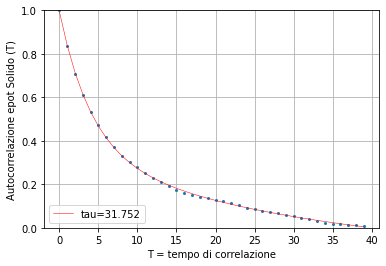

/tmp/ipykernel_143889/3907601839.py:6: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c + d * np.exp(-e * x) + f \


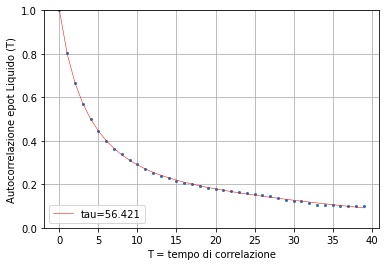

/tmp/ipykernel_143889/3907601839.py:9: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c + d * np.exp(-e * x)+f


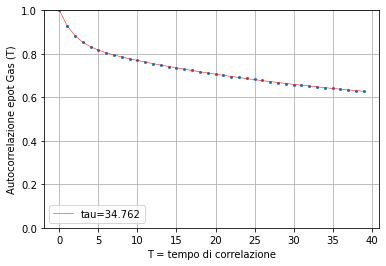

In [13]:
T=40
plotECorrelazione("Solido", "epot",T)
plotECorrelazione("Liquido", "epot",T)
plotECorrelazione("Gas","epot",T)


### Pressione

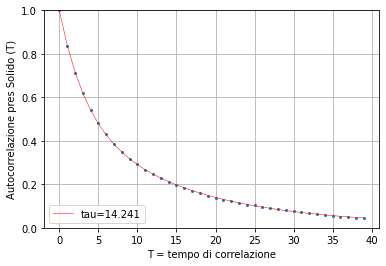

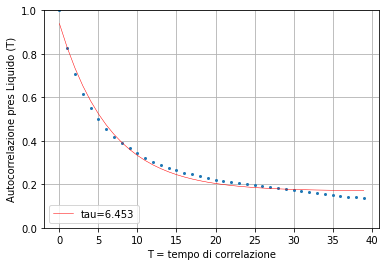

/tmp/ipykernel_143889/3907601839.py:9: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c + d * np.exp(-e * x)+f


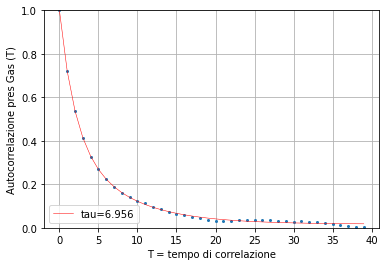

In [14]:
plotECorrelazione("Solido", "pres",T)
plotECorrelazione("Liquido", "pres",T)
plotECorrelazione("Gas","pres",T)

Osserviamo, anche guardando i dati puri, che l'energia potenziale del gas anche all'equilibrio fluttua notevolmente ed è notevolmente correlata (su scala di circa 10000 passi Monte Carlo).
Altra osservabile in cui si osservano notevoli correlazioni, anche se non di tale entità (cioè su scala molto più piccola, circa 1000 passi Monte Carlo), è la pressione del liquido.

Dunque nel valutare queste due osservabili per queste fasi, dovremmo scegliere blocchi più grandi rispetto agli altri casi.

In [3]:
ene = (np.loadtxt(fname = "dati/Gas/output.epot.0", usecols=(1)))#[30000:40000]
plt.errorbar (np.arange(len(ene)),ene)
plt.xlabel('t = passi Monte Carlo')
plt.ylabel('Epot Gas (t)')
plt.grid(True)
plt.show()

pres = (np.loadtxt(fname = "dati/Liquido/output.pres.0", usecols=(1)))[30000:32000]
plt.errorbar (np.arange(len(pres)),pres)
plt.xlabel('t = passi Monte Carlo')
plt.ylabel('Pres Liquido (t)')
plt.grid(True)
plt.show()

OSError: dati/Gas/output.epot.0 not found.

L'autocorrelazione dev'essere calcolata fino a tempi T significativamente minori del tempo Monte Carlo totale (la lunghezza del segnale), o si rischia di ottenere risultati non attendibili: <b>si hanno comportamenti che deviano dall'esponenziale quando T è confrontabile con la dimensione dei dati (il valore della correlazione per tempi simili al tempo totale non hanno molto senso poiché sono la media su pochi valori).</b>
Per avere l'autocorrelazione su uno spettro di T abbastanza ampi però non vogliamo neanche sceglierlo troppo piccolo (perché?). 
Come compromesso abbiamo posto T = 100.

Dall'analisi di questi dati osserviamo che nella maggior parte dei casi con blocchi da 10 passi dovremmo essere coperti.

2. Use the same data to study, with a python script, the estimation of the statistical uncertainties of the expectation value of $U/N$ and $P$ for different size of the blocks in the data blocking technique, from $L=M/N=10$ to $L=5\times 10^3$, being $N$ the number of blocks. <span style="color:red">Make pictures of these statistical uncertainties as a function of $L$.</span> What you observe in the statistical uncertainties after that the block size is large enough (from the point of view of the data blocking technique)?

Nota: per 5000 steps/blocco potrei avere fluttuazioni -> mi servono almeno 200000 blocchi perché venga bene

Nota: per questo esercizio, l'incertezza aumenta all'aumentare di steps/blocco fino a saturare, quando satura è la giusta steps/blocco.

In [4]:
import numpy as np
from matplotlib.pyplot import *
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

ene = (np.loadtxt(fname = "dati/Gas/output.epot.0", usecols=(1)))#[30000:40000]

dati = []
errori=[]

#    axs[0].xlabel('t = passi Monte Carlo')
 #   axs[0].ylabel('Epot Gas (t)')
   # axs[0].grid(True)

for L in range (1,50000):
    segnaleRidotto = [np.average(ene[L*i:L*(i+1)]) for i in range((int)(len(ene)/L))]
    dati.append(segnaleRidotto)
    errori.append(np.std(segnaleRidotto))


def f(L):
    fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize=(4,2))
    axs[0].set_ylim((-0.56,-0.2))
    axs[0].set_xlim((0,50000))
    axs[0].plot(np.arange(len(dati[L]))*L,dati[L],marker='.', markersize=4,linewidth=0)

    
    axs[1].set_ylim((0,0.08))
    axs[1].set_xlim((0,10000))
    axs[1].plot(np.arange(10000),1./np.sqrt(np.arange(10000)) ,marker='.',markersize=4,linewidth=0)
    
    axs[1].plot(L,errori[L],marker='.', markersize=10)

#f(800)
interact(f, L=widgets.IntSlider(min=1, max=10000, step=10, value=10));
show()

OSError: dati/Gas/output.epot.0 not found.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
Emin = 0
Emax = 1000000
ene = (np.loadtxt(fname = "gas1milionepunti/output.epot.0", usecols=(1)))

errori = np.zeros(1)
errori2 = np.zeros(1)
# se fisso L e faccio aumentare N, la deviazione standard non cambia
for L in range(10,50000,10):
    N = (int)((Emax -Emin)/L)
    segnaleRidotto =np.array([np.average(ene[Emin +L*i:Emin +L*(i+1)]) for i in range(N)])
    errori = np.append(errori, np.std(segnaleRidotto)) 
    errori2 = np.append(errori2, np.std(segnaleRidotto) )    


OSError: gas1milionepunti/output.epot.0 not found.

NameError: name 'errori' is not defined

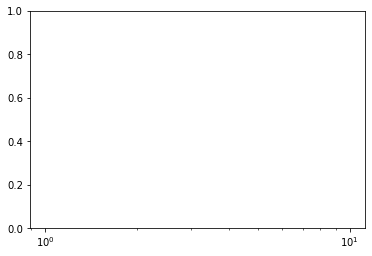

In [6]:

plt.xscale(value="log")
plt.plot(errori,'.', markersize=0.5)

plt.show()
# nota che l'asse x andrebbe moltiplicata per 10 (visto che gli L sono spaziati di 10)

plt.xscale(value="linear")
plt.plot(errori,'.', markersize=0.5)
plt.show()

In [ ]:
fig=plt.figure('prova')
ax=fig.add_subplot(111)
#p=plt.loglog(errori2)
p=plt.plot(errori2*np.sqrt(np.arange(errori2.size)))
plt.grid()
#ax.set_aspect('equal')
#plt.xlim(1,1000)
#plt.ylim(.001,.1)
x=np.linspace(1,1000)
#plt.plot(x,.01/np.sqrt(x))

In [ ]:
np.exp(-4)
np.log(0.01)
4.5*30
#in 4.5*tau  (taucirca 30)riduco le correlazioni all'1 percento delle iniziali
# torna con quest'ultima stima (circa 200)

### Exercise 07.2

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, as a function of the radial distance $r$ among particles, with $r \in \left[ 0; L/2\right]$ inside the Monte Carlo NVT code</span> we have provided: average value of $g(r)$ in each block (with output in the file: output.gofr.0), final average value of $g(r)$ with statistical uncertainties (with output in the file: output.gave.0).
Nota: per il calcolo della g(r) dovrebbero bastare 20000 step

### Exercise 07.3

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, inside the previously used Molecular Dynamics code</span>.

### Exercise 07.4

By means of your upgraded MC code, equilibrate and <span style="color:red">perform MC NVT simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) and Krypton ($\sigma = 0.364$ nm, $\epsilon/k_B = 164$ K, $m=83.798$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

<span style="color:red">show in pictures the obtained average values and uncertainties for the potential energy per particle, $U/N$, the pressure $P$ and the radial distribution function $g(r)$ in SI units ... and compare your MC results for the radial distribution function, $g(r)$, with those obtained with Molecular Dynamics NVE simulations in similar thermodynamic conditions.</span>